<a href="https://colab.research.google.com/github/Masterjun12/Generative_model/blob/main/GAN-and-elastic-deformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST data 불러오기(Test data를 사용하기 위함)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

# MNIST data load
(_, _), (test_images, test_labels) = mnist.load_data()

test_images = np.reshape(test_images, (-1,784))

In [ ]:
import numpy as np
import cv2
import random
from scipy.ndimage import gaussian_filter, map_coordinates

### 엘라스틱 디포메이션

In [ ]:
def elastic_deformation(image, alpha, sigma):
    random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))

    distorted_image = map_coordinates(image.reshape(shape), indices, order=1, mode='reflect')
    return distorted_image.reshape(shape)

def generate_augmented_data(images, labels, num_images_per_label=100, alpha=50, sigma=5):
    augmented_images = []
    augmented_labels = []

    for label in np.unique(labels):
        label_indices = np.where(labels == label)[0]
        selected_indices = np.random.choice(label_indices, min(num_images_per_label, len(label_indices)), replace=False)

        for idx in selected_indices:
            image = images[idx].reshape(28, 28)  # Reshape to 28x28
            augmented_image = elastic_deformation(image, alpha, sigma)
            augmented_images.append(augmented_image.flatten())  # Flatten back to (784,)
            augmented_labels.append(label)

    return np.array(augmented_images), np.array(augmented_labels)


### 학습할 data 불러오기

In [ ]:
alpha_list = [40, 50, 60, 70]

# Load extracted_train_images and extracted_train_labels
extracted_train_images = np.load('/content/extracted_train_images.npy')
extracted_train_labels = np.load('/content/extracted_train_labels.npy')

all_augmented_images = []
all_augmented_labels = []

for i in range(1, 4):
    for alpha in alpha_list:
        # Generate augmented data
        augmented_images, augmented_labels = generate_augmented_data(extracted_train_images, extracted_train_labels, alpha=alpha)

        all_augmented_images.append(augmented_images)
        all_augmented_labels.append(augmented_labels)

        print("Augmented images and labels for iteration", i, "with alpha", alpha, "have been generated.")

# Concatenate original and augmented data
new_train_images = np.concatenate((extracted_train_images, *all_augmented_images), axis=0)
new_train_labels = np.concatenate((extracted_train_labels, *all_augmented_labels), axis=0)

# Save new datasets
np.save('new_train_images.npy', new_train_images)
np.save('new_train_labels.npy', new_train_labels)

print("Shape of new_train_images:", new_train_images.shape)
print("Shape of new_train_labels:", new_train_labels.shape)


Augmented images and labels for iteration 1 with alpha 40 have been generated.
Augmented images and labels for iteration 1 with alpha 50 have been generated.
Augmented images and labels for iteration 1 with alpha 60 have been generated.
Augmented images and labels for iteration 1 with alpha 70 have been generated.
Augmented images and labels for iteration 2 with alpha 40 have been generated.
Augmented images and labels for iteration 2 with alpha 50 have been generated.
Augmented images and labels for iteration 2 with alpha 60 have been generated.
Augmented images and labels for iteration 2 with alpha 70 have been generated.
Augmented images and labels for iteration 3 with alpha 40 have been generated.
Augmented images and labels for iteration 3 with alpha 50 have been generated.
Augmented images and labels for iteration 3 with alpha 60 have been generated.
Augmented images and labels for iteration 3 with alpha 70 have been generated.
Shape of new_train_images: (13000, 784)
Shape of new

### 기존 이미지셋 확인

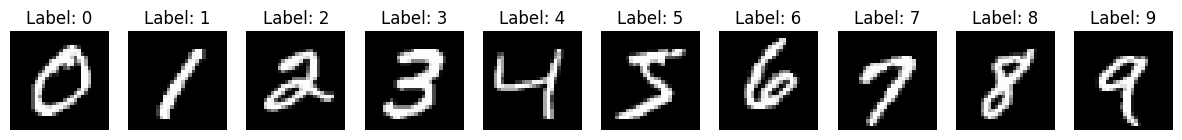

In [ ]:
import matplotlib.pyplot as plt

# Function to plot one image per label
def plot_images_per_label(images, labels):
    unique_labels = np.unique(labels)
    fig, axes = plt.subplots(1, len(unique_labels), figsize=(15, 3))

    for i, label in enumerate(unique_labels):
        # Find the index of the first image with the current label
        index = np.where(labels == label)[0][0]
        # Plot the image
        axes[i].imshow(images[index].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

    plt.show()

# Plot one image per label
plot_images_per_label(extracted_train_images, extracted_train_labels)


### 엘라스틱 디포메이션된 이미지셋 확인

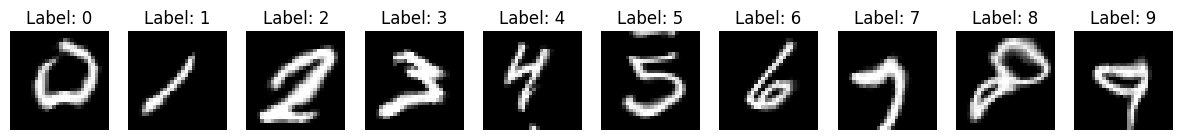

In [25]:
import matplotlib.pyplot as plt

plot_images_per_label(augmented_images, augmented_labels)


In [ ]:
!pip install tensorflow==2.16.0rc0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing insta

### GAN model

In [ ]:
# import numpy as np
# from keras.models import Sequential, Model
# from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Input
# from keras.optimizers import Adam

# # Load data
# new_train_images = np.load('new_train_images.npy')
# new_train_labels = np.load('new_train_labels.npy')

# # Reshape
# new_train_images = new_train_images.reshape(-1, 28, 28, 1)

# # generator model
# def build_generator(latent_dim):
#     generator = Sequential()
#     generator.add(Dense(7 * 7 * 64, input_dim=latent_dim))
#     generator.add(LeakyReLU(alpha=0.2))
#     generator.add(Reshape((7, 7, 64)))
#     generator.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
#     generator.add(LeakyReLU(alpha=0.2))
#     generator.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
#     generator.add(LeakyReLU(alpha=0.2))
#     generator.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
#     return generator

# # discriminator model
# def build_discriminator(input_shape):
#     discriminator = Sequential()
#     discriminator.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=input_shape))
#     discriminator.add(LeakyReLU(alpha=0.2))
#     discriminator.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
#     discriminator.add(LeakyReLU(alpha=0.2))
#     discriminator.add(Flatten())
#     discriminator.add(Dense(1, activation='sigmoid'))
#     return discriminator

# # GAN model
# def build_gan(generator, discriminator):
#     discriminator.trainable = False
#     gan_input = Input(shape=(latent_dim,))
#     x = generator(gan_input)
#     gan_output = discriminator(x)
#     gan = Model(gan_input, gan_output)
#     gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
#     return gan

# # hyperparameters
# latent_dim = 100
# image_shape = new_train_images.shape[1:]
# generator = build_generator(latent_dim)
# discriminator = build_discriminator(image_shape)
# gan = build_gan(generator, discriminator)

# # Generate random latent
# latent_vectors = np.random.normal(size=(len(new_train_images), latent_dim))

# # Train
# gan.fit(latent_vectors, np.ones(len(new_train_images)), epochs=100, batch_size=32)

# # Save
# generator.save_weights('generator_weights.h5')


In [28]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from keras.optimizers import Adam

# Load data
existing_train_images = np.load('new_train_images.npy')
existing_train_labels = np.load('new_train_labels.npy')

# generator model
latent_dim = 100
generator = build_generator(latent_dim)
generator.load_weights('generator_weights.h5')

# Generate
num_generated_images = 5000
latent_vectors = np.random.normal(size=(num_generated_images, latent_dim))
generated_images = generator.predict(latent_vectors)

# Reshape generated images
generated_images = generated_images.reshape(-1, 28*28)

# Combine generated images
combined_images = np.concatenate((existing_train_images, generated_images), axis=0)
combined_labels = np.concatenate((existing_train_labels, np.ones(num_generated_images)), axis=0)

# Save
np.save('new_train_images.npy', combined_images)
np.save('new_train_labels.npy', combined_labels)

print("Combined data has been saved to new npy files.")


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7ae8652bd5a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7ae8652bd5a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - 0s 2ms/step
Combined data has been saved to new npy files.


In [32]:
print(new_train_images.shape)
print(new_train_labels.shape)

(18000, 784)
(18000,)


### 모델 설정

In [29]:
# Define the model
model = tf.keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the extracted samples
model.fit(new_train_images, new_train_labels, epochs=5, batch_size=32, verbose=1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
407/407 [==============================] - 2s 2ms/step - loss: 1.0500 - accuracy: 0.6644
Epoch 2/5
407/407 [==============================] - 1s 2ms/step - loss: 0.5811 - accuracy: 0.8218
Epoch 3/5
407/407 [==============================] - 1s 2ms/step - loss: 0.4014 - accuracy: 0.8778
Epoch 4/5
407/407 [==============================] - 1s 2ms/step - loss: 0.2874 - accuracy: 0.9145
Epoch 5/5
407/407 [==============================] - 1s 2ms/step - loss: 0.2121 - accuracy: 0.9402
313/313 - 1s - loss: 21.5318 - accuracy: 0.9536 - 553ms/epoch - 2ms/step

Test accuracy: 0.9535999894142151


### 위 문제에서 모델의 모든 부분(구조, 옵티마이저, 손실함수, 에폭, 배치사이즈 등)은 고정시킨 상태에서 주어진 extracted_train_images를 조작하여 test data에 대한 accuracy를 향상시키세요.
#### * 단, MNIST data의 train data의 사용을 금지함, extracted_train_images 에 대해서 변환은 사용 가능